___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import keras
import tensorflow as tf
from matplotlib import pyplot
from keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [5]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

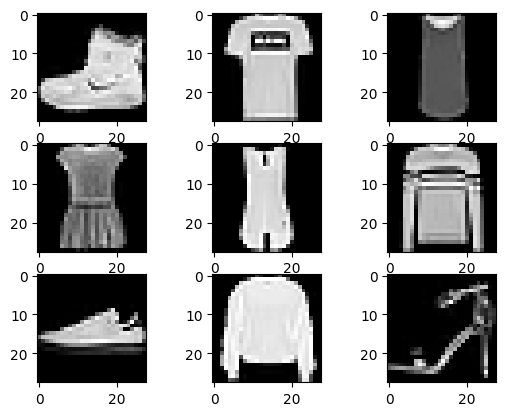

In [4]:
# plot first few images
for i in range(9):
 # define subplot
 pyplot.subplot(330 + 1 + i)
 # plot raw pixel data
 pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [6]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [7]:
print("Number of train data - " + str(len(x_train)))
print("Number of test data - " + str(len(x_test)))

Number of train data - 60000
Number of test data - 10000


In [8]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [9]:
# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [10]:
# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [11]:
# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)


In [12]:
# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

55000 train set
5000 validation set
10000 test set


# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [13]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=28, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=1))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=1))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [14]:
# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 28)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 32)        3616      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 26, 26, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 21632)             0         
                                                                 
 dense (Dense)               (None, 128)               2

In [15]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [16]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

##  Model Training

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [17]:
from keras.callbacks import ModelCheckpoint

model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
          callbacks=[early_stop]
          )

Epoch 1/10
860/860 [==============================] - 157s 181ms/step - loss: 0.3838 - accuracy: 0.8624 - val_loss: 0.2731 - val_accuracy: 0.8998
Epoch 2/10
860/860 [==============================] - 140s 163ms/step - loss: 0.2493 - accuracy: 0.9095 - val_loss: 0.2292 - val_accuracy: 0.9128
Epoch 3/10
860/860 [==============================] - 135s 157ms/step - loss: 0.2001 - accuracy: 0.9262 - val_loss: 0.2241 - val_accuracy: 0.9178
Epoch 4/10
860/860 [==============================] - 143s 167ms/step - loss: 0.1640 - accuracy: 0.9395 - val_loss: 0.2154 - val_accuracy: 0.9200
Epoch 5/10
860/860 [==============================] - 140s 163ms/step - loss: 0.1355 - accuracy: 0.9496 - val_loss: 0.2153 - val_accuracy: 0.9248
Epoch 6/10
860/860 [==============================] - 138s 161ms/step - loss: 0.1067 - accuracy: 0.9605 - val_loss: 0.2341 - val_accuracy: 0.9244
Epoch 7/10
860/860 [==============================] - 139s 162ms/step - loss: 0.0853 - accuracy: 0.9690 - val_loss: 0.2626 -

In [18]:
import pandas as pd

In [19]:
history = model.history.history
history

{'loss': [0.38384518027305603,
  0.24933071434497833,
  0.20009373128414154,
  0.1639801263809204,
  0.1354643702507019,
  0.10673841089010239,
  0.08531811833381653,
  0.06858737021684647,
  0.052634499967098236,
  0.04190170764923096],
 'accuracy': [0.8624181747436523,
  0.9095090627670288,
  0.9262363910675049,
  0.9394545555114746,
  0.9495636224746704,
  0.9605273008346558,
  0.968999981880188,
  0.9750000238418579,
  0.9806727170944214,
  0.9853090643882751],
 'val_loss': [0.2731282114982605,
  0.2291896492242813,
  0.2240978330373764,
  0.2153843492269516,
  0.21526660025119781,
  0.234085813164711,
  0.262578547000885,
  0.29779863357543945,
  0.2936854660511017,
  0.2942844033241272],
 'val_accuracy': [0.8998000025749207,
  0.9128000140190125,
  0.9178000092506409,
  0.9200000166893005,
  0.9247999787330627,
  0.9243999719619751,
  0.9161999821662903,
  0.9210000038146973,
  0.9204000234603882,
  0.9273999929428101]}

**TASK 7: Plot values of metrics you used in your model.**

In [20]:
import numpy as np

In [21]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3444523811340332
Test accuracy: 0.9192000031471252


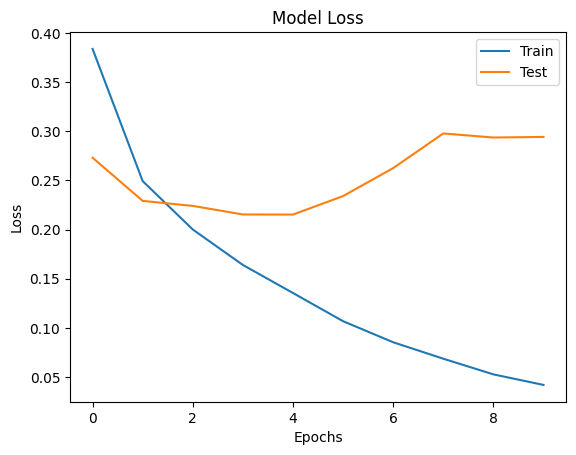

In [29]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

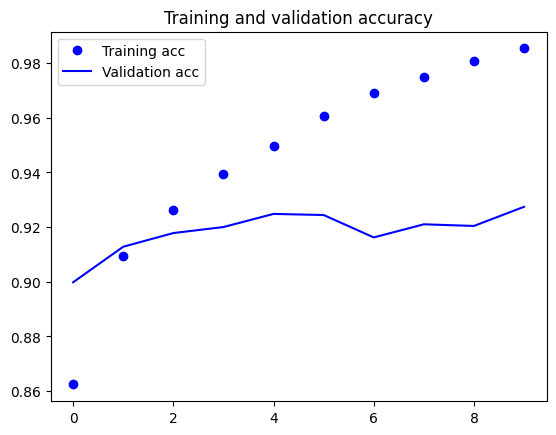

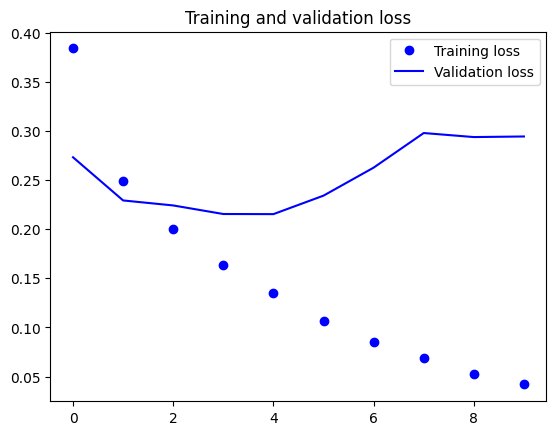

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [30]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    multilabel_confusion_matrix,
)

In [32]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 7s 22ms/step - loss: 0.3445 - accuracy: 0.9192


[0.3444523811340332, 0.9192000031471252]

In [34]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.3444523811340332
Test accuracy: 0.9192000031471252


In [45]:
pred_prob = (model.predict(x_test) > 0.5).astype("int32")
pred_prob

313/313 [==============================] - 8s 24ms/step


array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [46]:
pred_prob.shape

(10000, 10)

In [47]:
pred_prob[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int32)

In [48]:
np.argmax(pred_prob[0])

9

In [49]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [50]:
y_pred.shape

(10000,)

In [ ]:
y_pred_new = keras.utils.to_categorical(y_pred)

In [57]:
print(classification_report(y_test, y_pred_new))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1000
           1       0.99      0.99      0.99      1000
           2       0.90      0.85      0.88      1000
           3       0.94      0.90      0.92      1000
           4       0.90      0.84      0.87      1000
           5       0.99      0.98      0.98      1000
           6       0.73      0.80      0.76      1000
           7       0.97      0.96      0.97      1000
           8       0.99      0.98      0.98      1000
           9       0.96      0.98      0.97      1000

   micro avg       0.92      0.92      0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000
 samples avg       0.92      0.92      0.92     10000



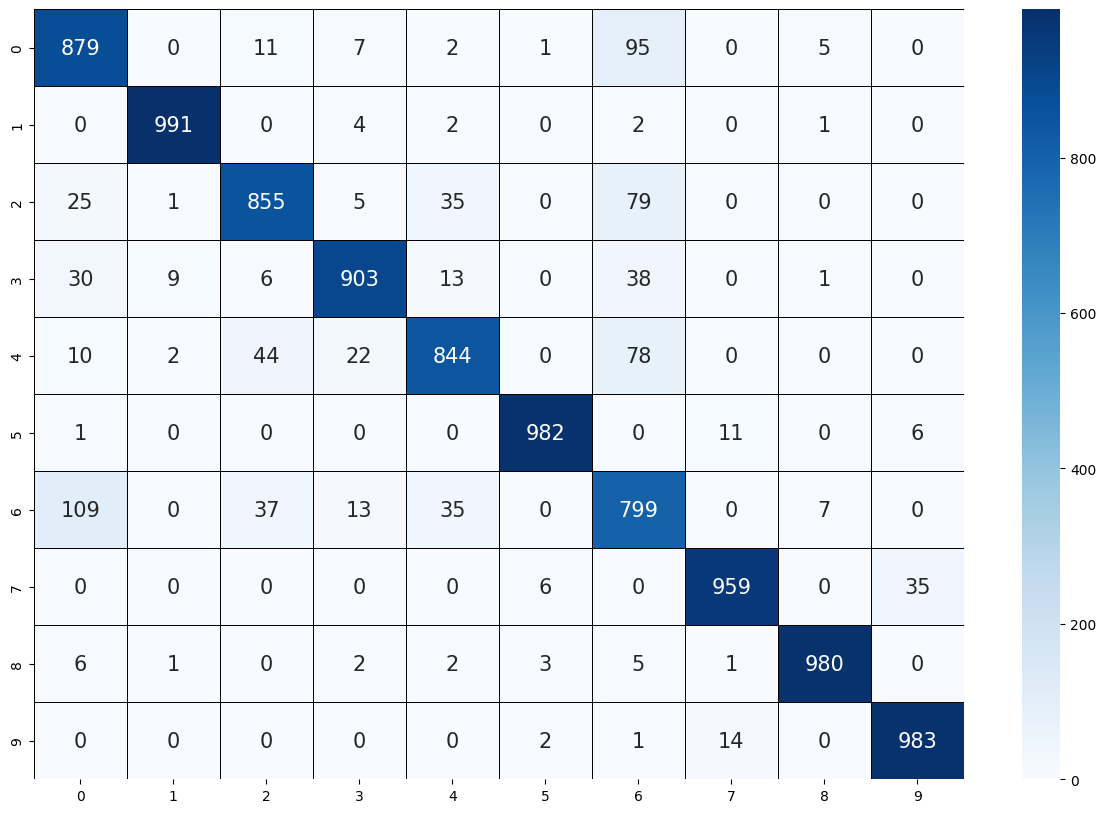

In [67]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    confusion_matrix(y_test.argmax(axis=1), y_pred_new.argmax(axis=1)),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 15},
)
plt.show()

In [68]:
# y_test != y_pred
np.not_equal(y_test, y_pred_new)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [69]:
# (y_test != y_pred).sum()
np.not_equal(y_test, y_pred_new).sum()

1650

In [70]:
np.equal(y_test, y_pred_new).sum()

98350

## Prediction

In [80]:
my_image = x_test[88]

In [81]:
my_image.shape

(28, 28, 1)

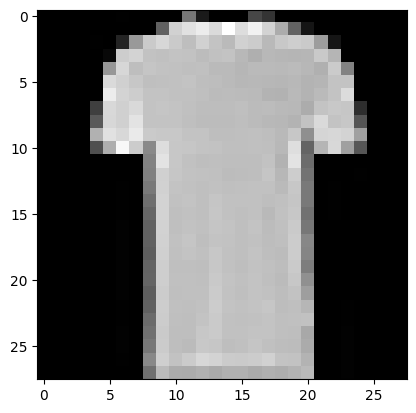

In [82]:
plt.imshow(my_image, cmap="gray")
plt.show()

In [85]:
pred_prob = model.predict(np.expand_dims(my_image, 0) > 0.5).astype("int32")
pred_prob

1/1 [==============================] - 0s 122ms/step


array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [86]:
# SHAPE --> (num_images, width, height, color_channels)
y_pred = np.argmax(pred_prob)
y_pred

0

In [88]:
model.save("cnn-1.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Using the saved model

In [89]:
model_n = tf.keras.models.load_model("cnn-1.h5")

In [90]:
pred_n = model_n.predict(np.expand_dims(x_test[24], 0))

1/1 [==============================] - 0s 142ms/step


In [91]:
np.argmax(pred_n)

1

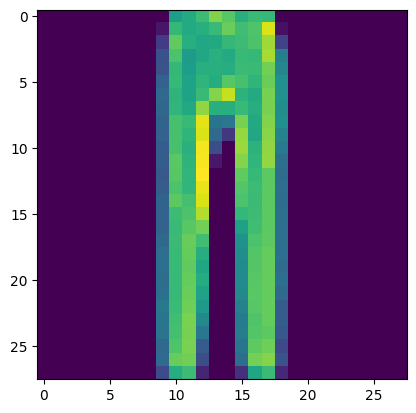

In [92]:
plt.imshow(x_test[24].reshape(28, 28))
plt.show()

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___